In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
readdata = pd.read_csv("Cancer_select_2.csv", index_col=0).iloc[:, 1:].drop(columns=['case_id', 'year_of_diagnosis', 'sample_type'])

#readdata.dropna(axis=0, inplace=True)

readdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 1005
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ethnicity                    1006 non-null   object 
 1   race                         1006 non-null   object 
 2   vital_status                 1006 non-null   object 
 3   age_at_index                 1006 non-null   int64  
 4   days_to_death                1006 non-null   float64
 5   ajcc_pathologic_stage        1006 non-null   object 
 6   days_to_last_follow_up       1006 non-null   float64
 7   age_at_diagnosis             1006 non-null   float64
 8   primary_diagnosis            1006 non-null   object 
 9   prior_malignancy             1006 non-null   object 
 10  prior_treatment              1006 non-null   object 
 11  ajcc_staging_system_edition  1006 non-null   object 
 12  ajcc_pathologic_t            1006 non-null   object 
 13  morphology        

In [10]:
readdata

,ethnicity,race,vital_status,age_at_index,days_to_death,ajcc_pathologic_stage,days_to_last_follow_up,age_at_diagnosis,primary_diagnosis,prior_malignancy,prior_treatment,ajcc_staging_system_edition,ajcc_pathologic_t,morphology,ajcc_pathologic_n,ajcc_pathologic_m,treatment_type,treatment_or_therapy,oct_embedded,tissue_type
0,not hispanic or latino,white,Alive,60,0.0,I,337.0,22279.0,"Infiltrating duct carcinoma, NOS",no,No,7th,T1,8500/3,N0,M0,"Radiation Therapy, NOS",no,No,Tumor
1,not hispanic or latino,white,Alive,56,0.0,II,5.0,20713.0,"Infiltrating duct carcinoma, NOS",no,No,others,T2,8500/3,N0,M0,"Pharmaceutical Therapy, NOS",no,false,Tumor
2,not hispanic or latino,white,Alive,61,0.0,I,759.0,22497.0,"Lobular carcinoma, NOS",yes,No,7th,T1,8520/3,N0,MX,"Pharmaceutical Therapy, NOS",yes,No,Tumor
3,not hispanic or latino,white,Alive,71,0.0,III,954.0,26274.0,"Lobular carcinoma, NOS",yes,No,7th,T3,8520/3,N1,MX,"Radiation Therapy, NOS",yes,No,Tumor
4,not reported,not reported,Alive,76,0.0,IV,304.0,27942.0,"Infiltrating duct carcinoma, NOS",no,No,6th,T2,8500/3,NX,others,"Radiation Therapy, NOS",no,No,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,not hispanic or latino,white,Alive,60,0.0,I,2813.0,22133.0,"Infiltrating duct carcinoma, NOS",no,No,6th,T1,8500/3,N0,M0,"Pharmaceutical Therapy, NOS",yes,false,Normal
1002,not hispanic or latino,black or african american,Alive,35,0.0,IV,5.0,12840.0,"Infiltrating duct carcinoma, NOS",no,No,7th,T4,8500/3,N1,others,"Pharmaceutical Therapy, NOS",no,false,Tumor
1003,not hispanic or latino,black or african american,Alive,46,0.0,I,1532.0,16978.0,"Infiltrating duct carcinoma, NOS",no,No,6th,T1,8500/3,N0,M0,"Pharmaceutical Therapy, NOS",yes,No,Tumor
1004,not hispanic or latino,white,Alive,71,0.0,II,375.0,25957.0,"Lobular carcinoma, NOS",no,No,7th,T2,8520/3,N0,M0,"Radiation Therapy, NOS",yes,No,Tumor


In [11]:
# separate features from target variable and encode y as 0 or 1

df = readdata.copy().drop(columns='vital_status', axis=1)
y = np.array(1*pd.get_dummies(readdata.copy()['vital_status'], drop_first=True)).ravel()

In [12]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=uint8), array([867, 139], dtype=int64))

In [13]:
drop_nan = readdata.dropna(axis=0)


y_nan = np.array(1*pd.get_dummies(drop_nan.copy()['vital_status'], drop_first=True)).ravel()

np.unique(y_nan, return_counts=True)

(array([0, 1], dtype=uint8), array([867, 139], dtype=int64))

In [14]:
# obtain constant columns
constant_columns = []
for column in df.columns:
    if len(np.unique(df[column])) == 1:
        constant_columns.append(column)

print(f"The following variables have constant entries: {constant_columns} and the length is {len(constant_columns)}.")

The following variables have constant entries: [] and the length is 0.


In [15]:
categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
print(f"The categorical columns are: {categorical_columns} and the length is {len(categorical_columns)}.")

continuous_columns = [cols for cols in df.columns if df[cols].dtype in ["float64", "int64"]]
print(f"The continuous columns are: {continuous_columns} and the length is {len(continuous_columns)}.")

boolean_columns = [col_ for col_ in df.columns if df[col_].dtype == "bool"]
print(f"The boolean columns are: {boolean_columns} and the length is {len(boolean_columns)}.")

The categorical columns are: ['ethnicity', 'race', 'ajcc_pathologic_stage', 'primary_diagnosis', 'prior_malignancy', 'prior_treatment', 'ajcc_staging_system_edition', 'ajcc_pathologic_t', 'morphology', 'ajcc_pathologic_n', 'ajcc_pathologic_m', 'treatment_type', 'treatment_or_therapy', 'oct_embedded', 'tissue_type'] and the length is 15.
The continuous columns are: ['age_at_index', 'days_to_death', 'days_to_last_follow_up', 'age_at_diagnosis'] and the length is 4.
The boolean columns are: [] and the length is 0.


In [16]:
# one hot encode categorical columns
df2 = df[categorical_columns].copy()
# Iterate through each column in the dataframe
for column in categorical_columns:
    one_hot = pd.get_dummies(df2[column], prefix=column).astype(int)
    # Drop the original column from the dataframe
    df2.drop(column, axis=1, inplace=True)
    # Join the new one-hot encoded columns to the original dataframe
    df2 = df2.join(one_hot)

In [17]:
new_df = pd.concat([df[continuous_columns], df2], axis=1)

new_df

,age_at_index,days_to_death,days_to_last_follow_up,age_at_diagnosis,ethnicity_hispanic or latino,ethnicity_not hispanic or latino,ethnicity_not reported,race_american indian or alaska native,race_asian,race_black or african american,...,"treatment_type_Pharmaceutical Therapy, NOS","treatment_type_Radiation Therapy, NOS",treatment_or_therapy_no,treatment_or_therapy_not reported,treatment_or_therapy_yes,oct_embedded_No,oct_embedded_false,oct_embedded_true,tissue_type_Normal,tissue_type_Tumor
0,60,0.0,337.0,22279.0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
1,56,0.0,5.0,20713.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
2,61,0.0,759.0,22497.0,0,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
3,71,0.0,954.0,26274.0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
4,76,0.0,304.0,27942.0,0,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,60,0.0,2813.0,22133.0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
1002,35,0.0,5.0,12840.0,0,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
1003,46,0.0,1532.0,16978.0,0,1,0,0,0,1,...,1,0,0,0,1,1,0,0,0,1
1004,71,0.0,375.0,25957.0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1


In [18]:
xtrain_, xtest, ytrain_, ytest = train_test_split(new_df, y, train_size=0.8, shuffle=True, stratify=y)

# create validation set
xtrain, xval, ytrain, yval = train_test_split(xtrain_, ytrain_, test_size=0.2, shuffle=True, stratify=ytrain_)

scale = MinMaxScaler()
xtrain = scale.fit_transform(xtrain)
xval = scale.transform(xval)

xval

array([[0.546875  , 0.        , 0.06217859, ..., 1.        , 0.        ,
        1.        ],
       [0.84375   , 0.04050973, 0.01355774, ..., 0.        , 0.        ,
        1.        ],
       [0.796875  , 0.12649229, 0.14129329, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.59375   , 0.        , 0.28354371, ..., 0.        , 0.        ,
        1.        ],
       [0.4375    , 0.        , 0.06054231, ..., 0.        , 0.        ,
        1.        ],
       [0.765625  , 0.        , 0.06229547, ..., 0.        , 0.        ,
        1.        ]])

In [24]:
models = {'rf': RandomForestClassifier(),
          'adaboost': AdaBoostClassifier(algorithm='SAMME'),
          'svc': SVC(),
          'logreg': LogisticRegression(max_iter=1000),
          'knn': KNeighborsClassifier(n_neighbors=10),
          'mlp': MLPClassifier(max_iter=1000)
}

results = {}
for name, model in models.items():
    model.fit(xtrain.copy(), ytrain.copy())  # Train model
    ypred_train = model.predict(xtrain.copy())  # Predict on train data
    ypred_val = model.predict(xval.copy())  # Predict on test data
    train_accuracy = accuracy_score(ytrain.copy(), ypred_train)  # Calculate training accuracy
    val_accuracy = accuracy_score(yval.copy(), ypred_val)  # Calculate validation accuracy

    results[name] = {
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': val_accuracy
    }
    print(f"{name} - Training Accuracy: {train_accuracy:.2f}, Validation Accuracy: {val_accuracy:.2f}")

rf - Training Accuracy: 1.00, Validation Accuracy: 1.00
adaboost - Training Accuracy: 1.00, Validation Accuracy: 0.99
svc - Training Accuracy: 0.91, Validation Accuracy: 0.93
logreg - Training Accuracy: 0.94, Validation Accuracy: 0.93
knn - Training Accuracy: 0.89, Validation Accuracy: 0.90
mlp - Training Accuracy: 1.00, Validation Accuracy: 0.95


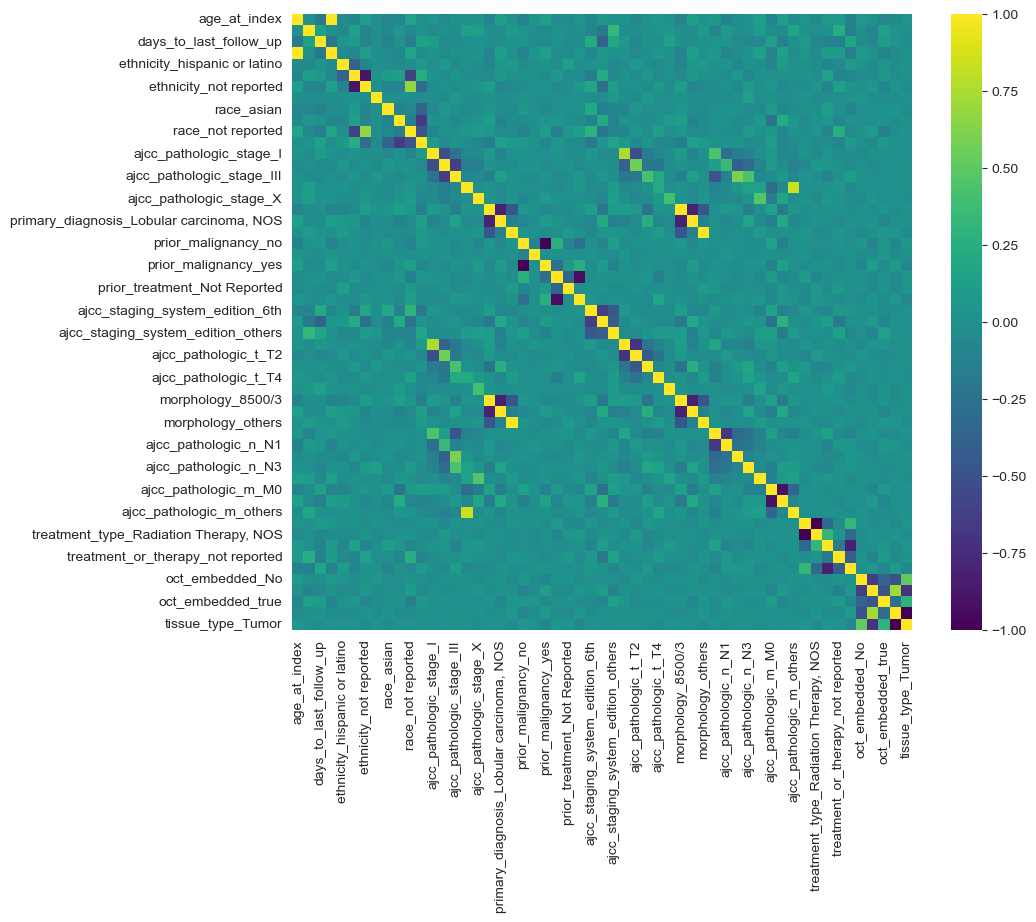

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = new_df.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(corr, cmap='viridis')
plt.show()